## OBJECTIVE

Upon initial inspection of the data, there are some problem we might wonder about: 
* What is the overall sales trend?
* What are the top 10 and bottom 10 by sales? 
* What are the most/ least selling products?
* Which is the most prefered ship mode?
* Which are the most profittable category and sub - category?

## IMPORTING LIBRARIES

In [51]:
# Data manipulation
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## IMPORTING THE DATASET

In [4]:
df = pd.read_excel('superstore_sales.xlsx')

## OVERVIEW OF THE DATASET

In [5]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [7]:
# How many rows and columns in the dataset?
df.shape

(51290, 21)

In [8]:
# All the columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [10]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [11]:
# Number of missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
# Statistics summary of numerical values
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## EXPLORATORY DATA ANALYSIS

### What is the overall sales trend?

In [14]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [15]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

* We explore the dataset from 2011 to 2014.

In [16]:
# Transform the format of timestamp
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [25]:
df_trend = df.groupby('month_year').sum().reset_index()

In [26]:
df_trend.head()

,month_year,sales,quantity,discount,profit,shipping_cost,year
0,2011-01,98898.48886,1463,68.758,8321.80096,10544.7880,870763
1,2011-02,91152.15698,1224,52.252,12417.90698,10681.1630,760158
2,2011-03,145729.36736,1836,74.212,15303.56826,13096.1855,1083929
3,2011-04,116915.76418,2020,80.782,12902.32438,12954.5200,1134204
4,2011-05,146747.83610,2013,82.382,12183.82870,16443.2060,1138226


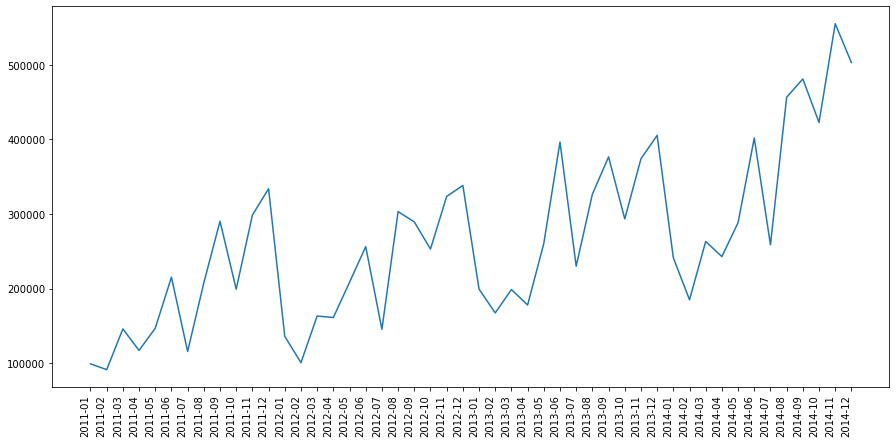

In [29]:
#Visualize the trend of sales in this period
plt.figure(figsize = (15, 7))
plt.plot(df_trend['month_year'], df_trend['sales'])
plt.xticks(rotation = 90, ha = 'right')
plt.show()

### What are the top 10 and bottom 10 products by sales?

In [31]:
product_sales = df.groupby('product_name').sum()['sales'].reset_index()
product_sales

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [37]:
# Top 10 products having highest sales index
top_10 = product_sales.sort_values(by = 'sales', ascending = False).head(10)
top_10

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


In [36]:
# Bottom 10 products having lowest sales index
bottom_10 = product_sales.sort_values(by = 'sales').head(10)
bottom_10

,product_name,sales
1368,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
373,Avery 5,5.760
3707,Xerox 20,6.480
1641,Grip Seal Envelopes,7.072
438,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
434,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
3694,Xerox 1989,7.968
26,4009 Highlighters,8.040
3334,Stockwell Gold Paper Clips,8.096
2431,Newell 308,8.400


### Which are the most/ least selling products?

In [38]:
quantity_product = df.groupby('product_name').sum()['quantity'].reset_index()

In [39]:
# Top 10 best seller products
top_quantity = quantity_product.sort_values('quantity', ascending = False).head(10)
top_quantity

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


In [40]:
# 10 products having least selling quantity
bottom_quantity = quantity_product.sort_values('quantity').head(10)
bottom_quantity

,product_name,quantity
2734,Penpower WorldCard Pro Card Scanner,1
679,Boston 1900 Electric Pencil Sharpener,1
797,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
930,"Chromcraft Training Table, Adjustable Height",1
3707,Xerox 20,1
1559,Global Enterprise Series Seating Low-Back Swiv...,1
1368,Eureka Disposable Bags for Sanitaire Vibra Gro...,2
373,Avery 5,2
3689,Xerox 1984,2
2682,PNY Rapid USB Car Charger - Black,2


### Which is the most prefered ship mode?

In [47]:
df_ship_mode = df.groupby('ship_mode').count()['order_id'].reset_index()

In [48]:
df_ship_mode

,ship_mode,order_id
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

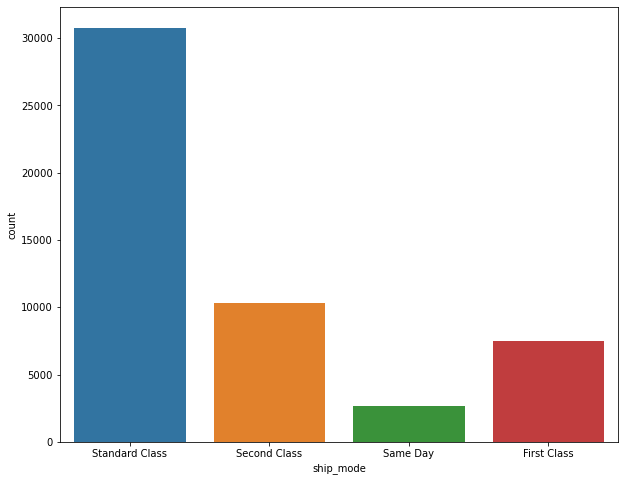

In [55]:
#Setting figure size
plt.figure(figsize = (10, 8))

# Plotting the ship mode
sns.countplot(df['ship_mode'])

### Which are the most profitable category and sub - category?

In [60]:
category_profit = df.groupby('category').sum()['profit'].reset_index()
category_profit.sort_values('profit', ascending = False)

,category,profit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,286782.25380


* Technology is the category having the highest profit.

In [82]:
sub_cat_profit = df.groupby(['category','sub_category']).sum()['profit'].reset_index()
sub_cat_profit.sort_values('profit', ascending = False)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
4,Office Supplies,Appliances,141680.58940
13,Technology,Accessories,129626.30620
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
15,Technology,Machines,58867.87300


* Copiers is the sub - category having the highest profit.

### Category & sub - category have highest profit in each market 

In [66]:
market_profit = df.groupby('market').sum()['profit'].reset_index()
market_profit.sort_values('profit', ascending = False)

,market,profit
0,APAC,437577.57900
4,EU,372829.74150
6,US,286397.02170
5,LATAM,221643.48708
1,Africa,88871.63100
3,EMEA,43897.97100
2,Canada,17817.39000


In [78]:
market_apac = df[df['market'] == 'APAC'].groupby(['category', 'sub_category']).sum()['profit'].reset_index()
market_apac.sort_values(['category', 'profit'], ascending = False)

,category,sub_category,profit
16,Technology,Phones,81314.0562
14,Technology,Copiers,80854.0452
15,Technology,Machines,26542.6401
13,Technology,Accessories,15883.1145
4,Office Supplies,Appliances,42128.7090
11,Office Supplies,Storage,24744.1714
6,Office Supplies,Binders,10797.6297
5,Office Supplies,Art,7338.7399
10,Office Supplies,Paper,6871.6494
7,Office Supplies,Envelopes,5223.7686


In [79]:
market_eu = df[df['market'] == 'EU'].groupby(['category', 'sub_category']).sum()['profit'].reset_index()
market_eu.sort_values(['category', 'profit'], ascending = False)

,category,sub_category,profit
14,Technology,Copiers,56199.6540
16,Technology,Phones,37344.3720
13,Technology,Accessories,33441.5430
15,Technology,Machines,17287.0890
4,Office Supplies,Appliances,46337.4330
5,Office Supplies,Art,30793.7040
11,Office Supplies,Storage,27949.9170
6,Office Supplies,Binders,19760.2200
12,Office Supplies,Supplies,9625.1130
10,Office Supplies,Paper,8883.5610


In [80]:
market_us = df[df['market'] == 'US'].groupby(['category', 'sub_category']).sum()['profit'].reset_index()
market_us.sort_values(['category', 'profit'], ascending = False)

,category,sub_category,profit
14,Technology,Copiers,55617.8249
16,Technology,Phones,44515.7306
13,Technology,Accessories,41936.6357
15,Technology,Machines,3384.7569
10,Office Supplies,Paper,34053.5693
6,Office Supplies,Binders,30221.7633
11,Office Supplies,Storage,21278.8264
4,Office Supplies,Appliances,18138.0054
7,Office Supplies,Envelopes,6964.1767
5,Office Supplies,Art,6527.7870
